--- Part 1: Binary Classification Tree Analysis ---
Classification dataset loaded successfully.
Dataset head:
    Feature1  Feature2  Label
0  0.911100 -0.499137    0.0
1 -1.460326 -0.681642    0.0
2 -1.063950 -1.106004    0.0
3  1.723053  1.159836    1.0
4 -1.078729  1.067450    0.0


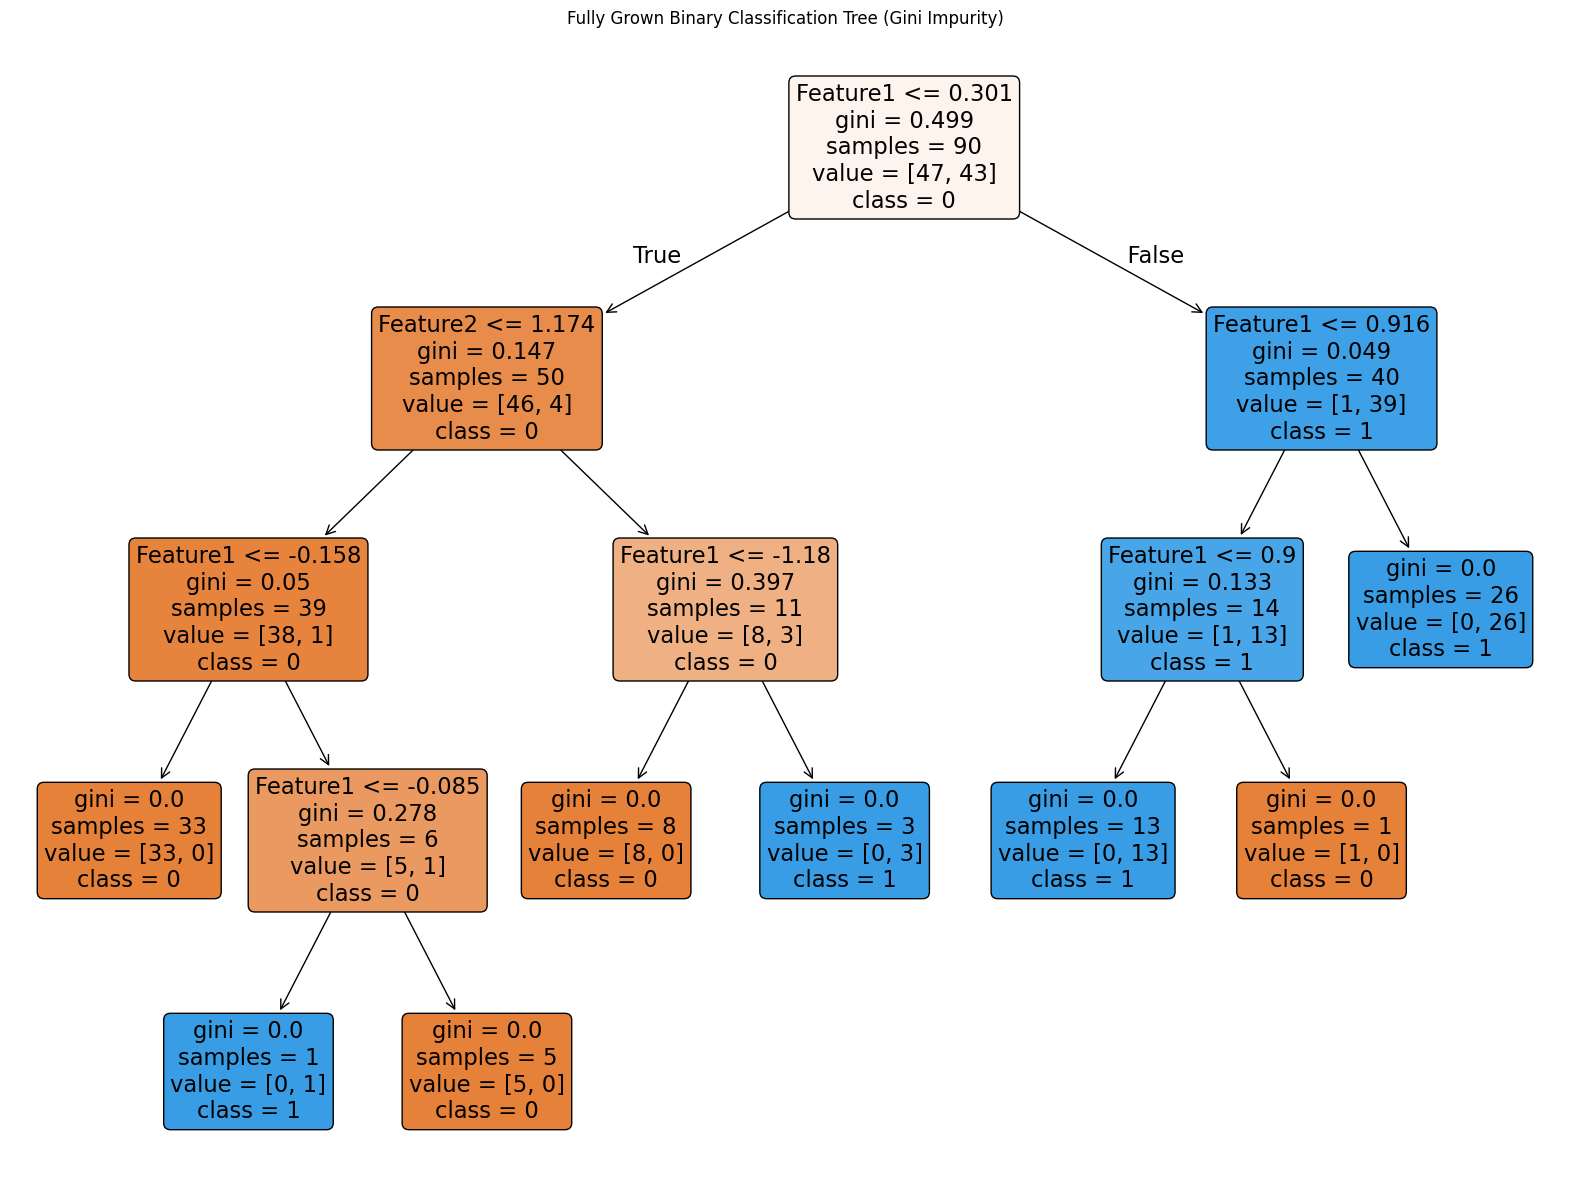


Fully grown tree depth: 4


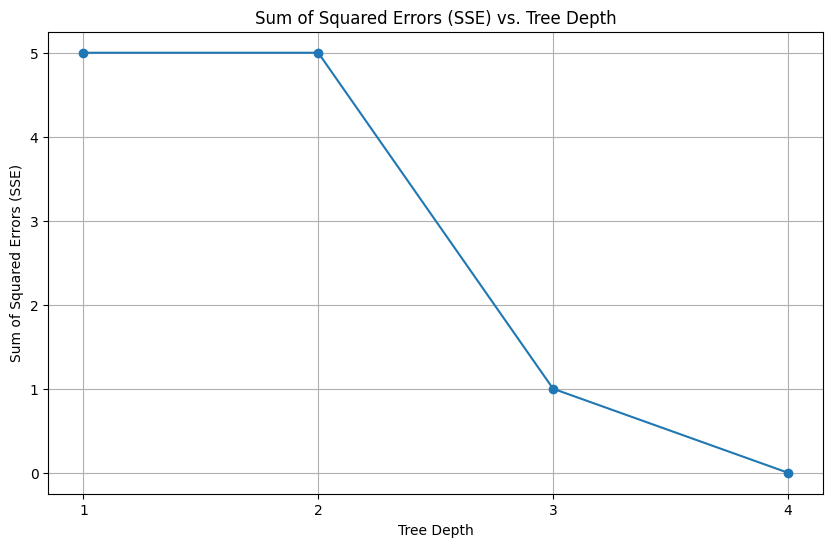


SSE values per depth: [np.float64(5.0), np.float64(5.0), np.float64(1.0), np.float64(0.0)]
Change in SSE between depths: [ 0. -4. -1.]
Optimal pruning depth determined to be: 3


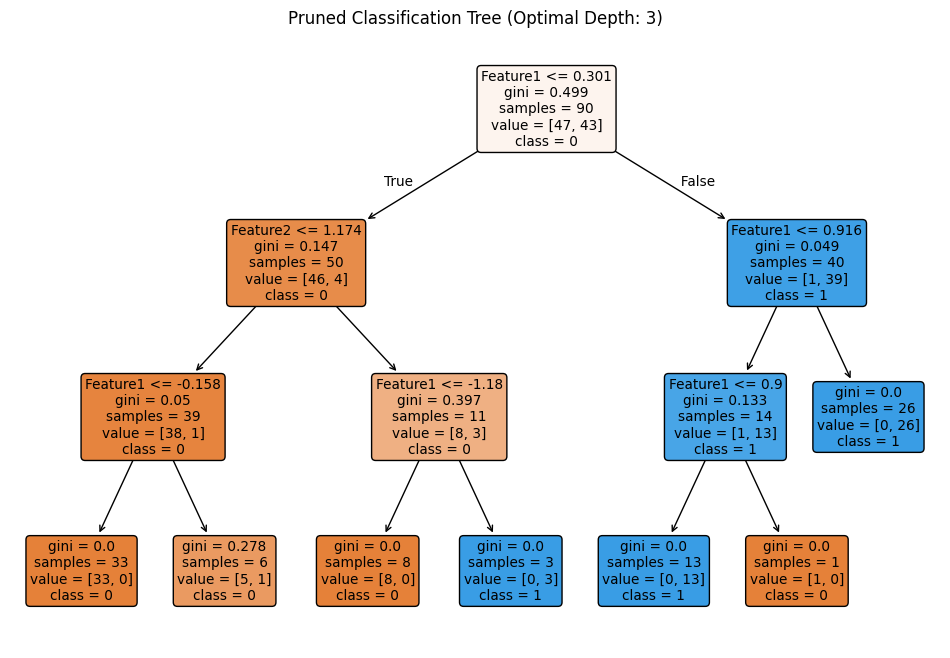


--- Part 2: Linear Regression Analysis ---

Regression dataset loaded successfully.
Dataset head:
    Samples  Feature 1  Feature 2  Output
0        1        0.7      48000       1
1        2        1.9      48000       0
2        3        2.5      60000       1
3        4        4.2      63000       0
4        5        6.0      76000       0

Data split into training (160 samples) and testing (40 samples).

Linear Regression Mean Squared Error (MSE) on Test Data: 0.1090

Feature Coefficients (Weights):
  - Feature 1: 0.1468
  - Feature 2: -0.0000


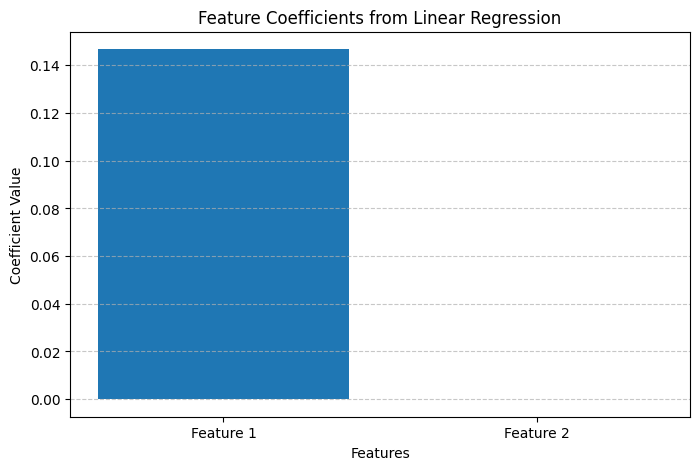

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# --- Part 1: Binary Classification Tree ---
print("--- Part 1: Binary Classification Tree Analysis ---")

# Load the dataset for classification
try:
    class_df = pd.read_csv('A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv')
    print("Classification dataset loaded successfully.")
    print("Dataset head:\n", class_df.head())
except FileNotFoundError:
    print("Error: 'A4_test.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy dataframe to avoid crashing the rest of the script
    class_df = pd.DataFrame({
        'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Label': np.random.randint(0, 2, 100)
    })
    print("Continuing with a dummy classification dataset.")


# Separate features (X) and target (y)
X_class = class_df[['Feature1', 'Feature2']]
y_class = class_df['Label']

# 1a. Train a fully grown binary classification tree
# We use Gini impurity as the criterion. By not setting max_depth, the tree will grow fully.
full_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
full_tree.fit(X_class, y_class)

# Visualize the fully grown tree
plt.figure(figsize=(20, 15))
plot_tree(full_tree, feature_names=X_class.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Fully Grown Binary Classification Tree (Gini Impurity)")
plt.show()

print(f"\nFully grown tree depth: {full_tree.get_depth()}")

# 1b. Compute Sum of Squared Errors (SSE) at each depth
max_depth = full_tree.get_depth()
sse_values = []
depths = range(1, max_depth + 1)

for depth in depths:
    # Train a tree at a specific depth
    tree_at_depth = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    tree_at_depth.fit(X_class, y_class)

    # Predict on the same test data
    y_pred = tree_at_depth.predict(X_class)

    # Calculate SSE
    sse = np.sum((y_class - y_pred)**2)
    sse_values.append(sse)

# Plot the variation of SSE with depth
plt.figure(figsize=(10, 6))
plt.plot(depths, sse_values, marker='o', linestyle='-')
plt.title("Sum of Squared Errors (SSE) vs. Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(depths)
plt.grid(True)
plt.show()

# 1c. Determine the optimal pruning depth
# We find the depth where the change in SSE is minimal.
# This indicates the point of diminishing returns, i.e., the "elbow" of the curve.
sse_changes = np.diff(sse_values)

# The optimal depth is where the reduction in SSE starts to level off.
# We'll choose the depth just before the smallest change occurs.
# Adding 1 because np.diff gives n-1 elements and depths are 1-indexed.
# We look for the point where the rate of decrease slows down.
if len(sse_changes) > 0:
    # Find the index of the smallest *decrease* (most negative change is largest decrease)
    # We want to find where the decrease becomes less significant.
    # Let's find the "elbow" by looking at the second derivative (change in the change)
    sse_second_derivative = np.diff(sse_changes)
    # The elbow is where the second derivative is maximum.
    # Add 1 for 0-indexing of array and another 1 because our depths start from 1.
    optimal_depth = np.argmax(sse_second_derivative) + 2
else:
    optimal_depth = 1

print(f"\nSSE values per depth: {sse_values}")
print(f"Change in SSE between depths: {sse_changes}")
print(f"Optimal pruning depth determined to be: {optimal_depth}")

# 1d. Visualize the pruned tree
pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X_class, y_class)

plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, feature_names=X_class.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f"Pruned Classification Tree (Optimal Depth: {optimal_depth})")
plt.show()


# --- Part 2: Regression Models ---
print("\n--- Part 2: Linear Regression Analysis ---")

# Load the dataset for regression
try:
    reg_df_raw = pd.read_csv('A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv')
    # Clean up column names by removing leading/trailing spaces
    reg_df_raw.columns = reg_df_raw.columns.str.strip()
    print("\nRegression dataset loaded successfully.")
    print("Dataset head:\n", reg_df_raw.head())
except FileNotFoundError:
    print("Error: 'A2_P2.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy dataframe
    reg_df_raw = pd.DataFrame({
        'Samples': range(100),
        'Feature 1': np.random.rand(100) * 10,
        'Feature 2': np.random.randint(40000, 100000, 100),
        'Output': np.random.randint(0, 2, 100)
    })
    print("Continuing with a dummy regression dataset.")

# Prepare the data: Drop the 'Samples' column as it's an index
reg_df = reg_df_raw.drop('Samples', axis=1)

# Separate features (X) and target (y)
X_reg = reg_df[['Feature 1', 'Feature 2']]
y_reg = reg_df['Output']

# Divide the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"\nData split into training ({len(X_train)} samples) and testing ({len(X_test)} samples).")

# 2a. Implement Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Compute MSE on the test dataset
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"\nLinear Regression Mean Squared Error (MSE) on Test Data: {mse_lr:.4f}")

# Get feature coefficients (weights)
coefficients = lin_reg.coef_
features = X_train.columns

print("\nFeature Coefficients (Weights):")
for feature, coef in zip(features, coefficients):
    print(f"  - {feature}: {coef:.4f}")

# Use bar plots to compare feature coefficients
plt.figure(figsize=(8, 5))
plt.bar(features, coefficients, color=['#1f77b4', '#ff7f0e'])
plt.title("Feature Coefficients from Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
